In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 20.9MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
print(mobile_sales.shape)
mobile_sales.head()

(217, 2)


,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [ ]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [ ]:
# mobile_sales.set_index('DATE', inplace = True)
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.set_index('DATE', inplace = True)

In [ ]:
# 2 things to check while working on Time Series Data ->
# 1. Missing values
# 2. Anomalies

# Handling Missing Values

In [ ]:
mobile_sales.isna().sum()

,0
Sales,19


<Axes: xlabel='DATE'>

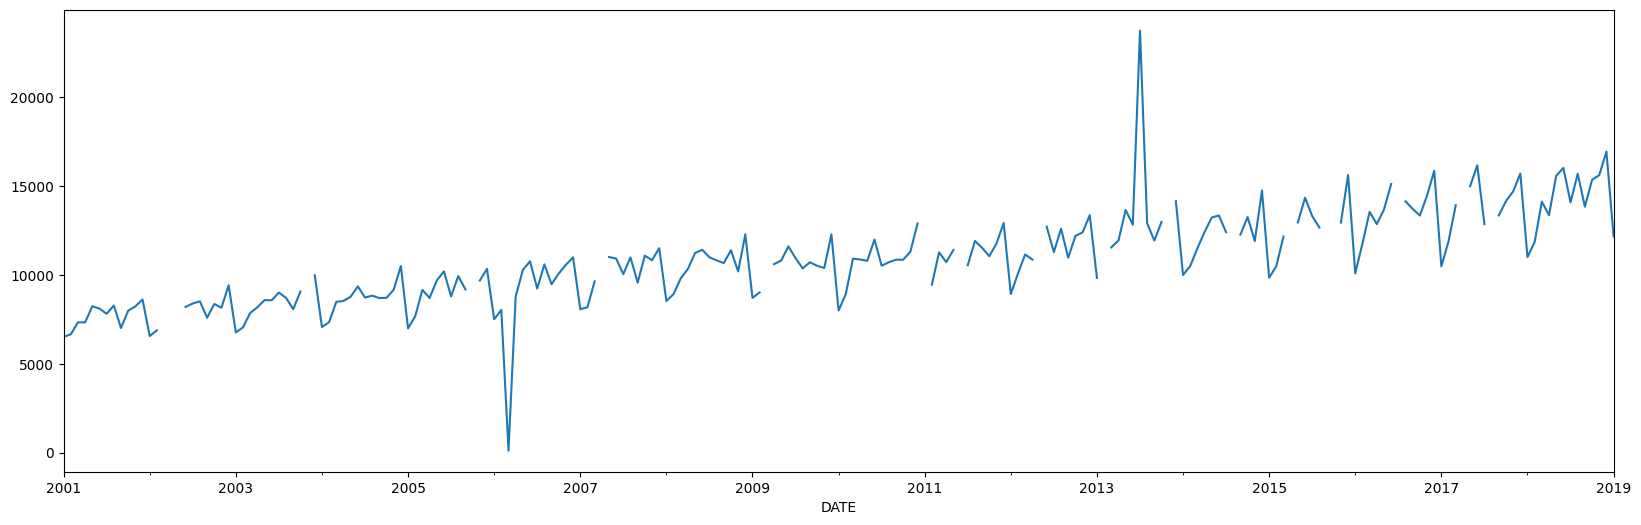

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)

mobile_sales['Sales'].plot()

In [ ]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


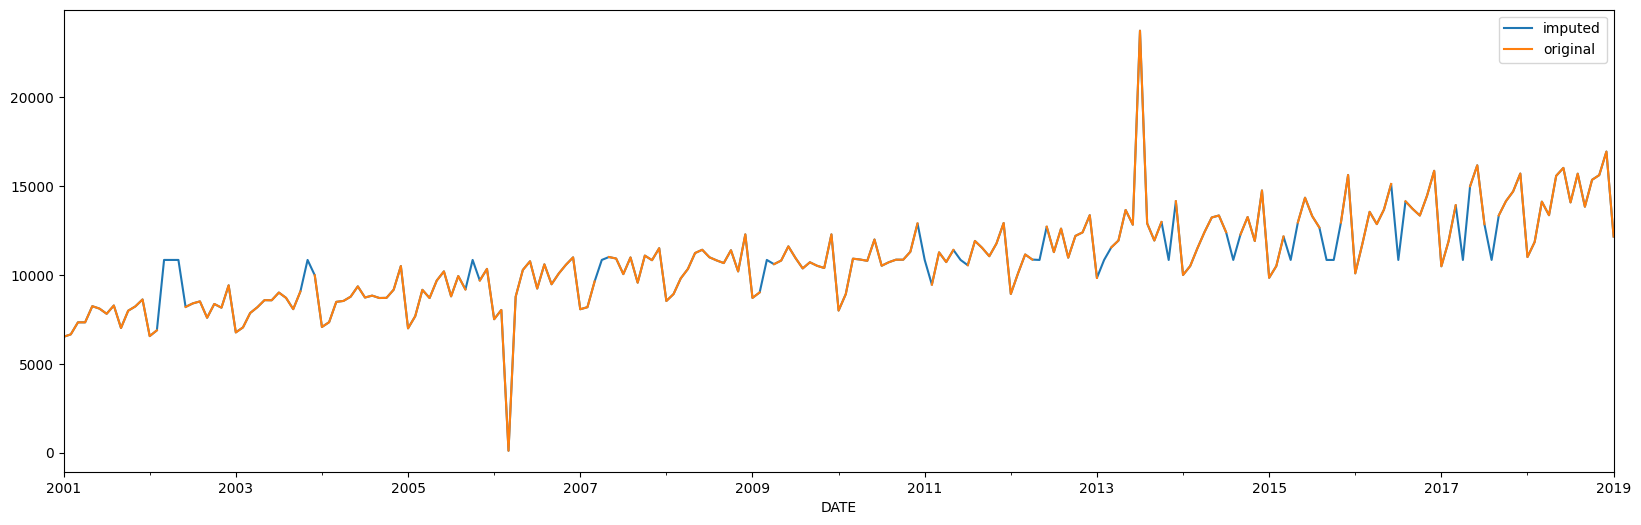

In [ ]:
# 1st method - Imputing it by mean of entire series

mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

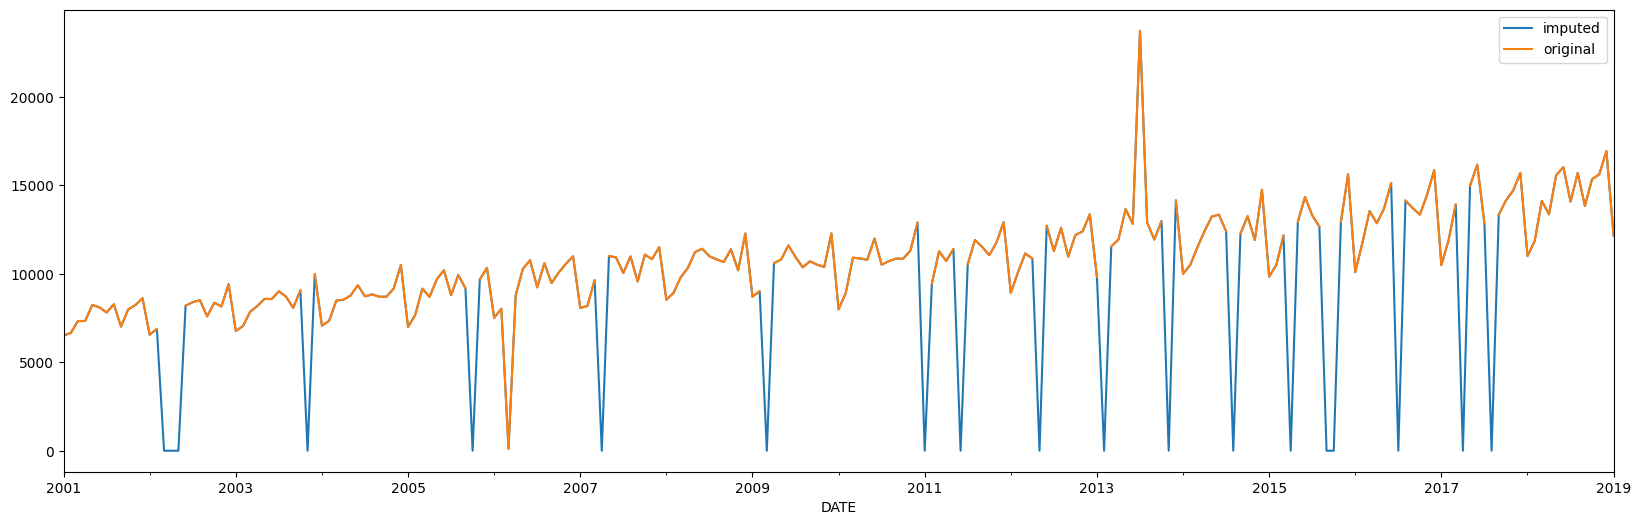

In [ ]:
# 2nd method - Imputing it by a constant like 0

mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

**Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

![picture](https://drive.google.com/uc?export=view&id=1Lk-Km2n9Usx_V9ikYrlnVv0aqHDs8Meq)


This is called **Linear Interpolation**.

Let's apply this now.

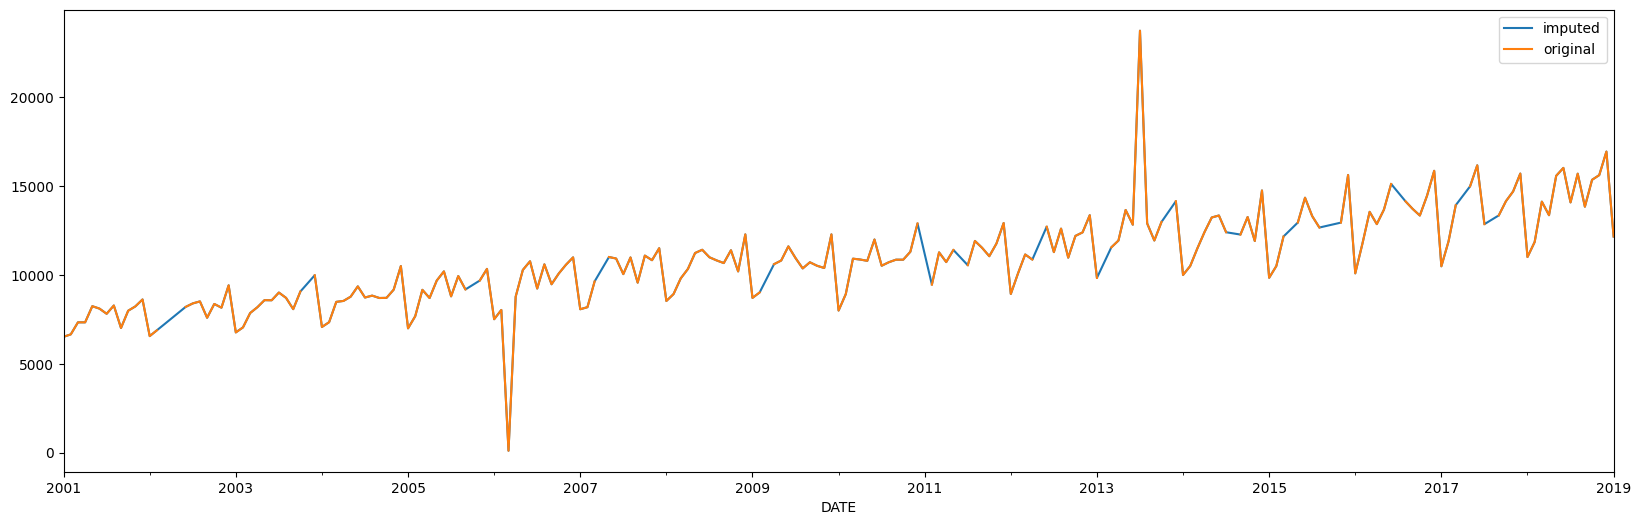

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

This looks better than the previous plot.

The imputed values don't seem to be forced.

We're essentially joining the first point before and first point after the missing values with a **straight line** in the plot.

**Other types of interpolations**

Besides linear, there exist other types of interpolation, some of them are:-
- `pad`: Fill in NaN using existing values
- `polynomial`: You need to specify an **order**

# Moving Average

In [ ]:
# Sliding window -> rolling()

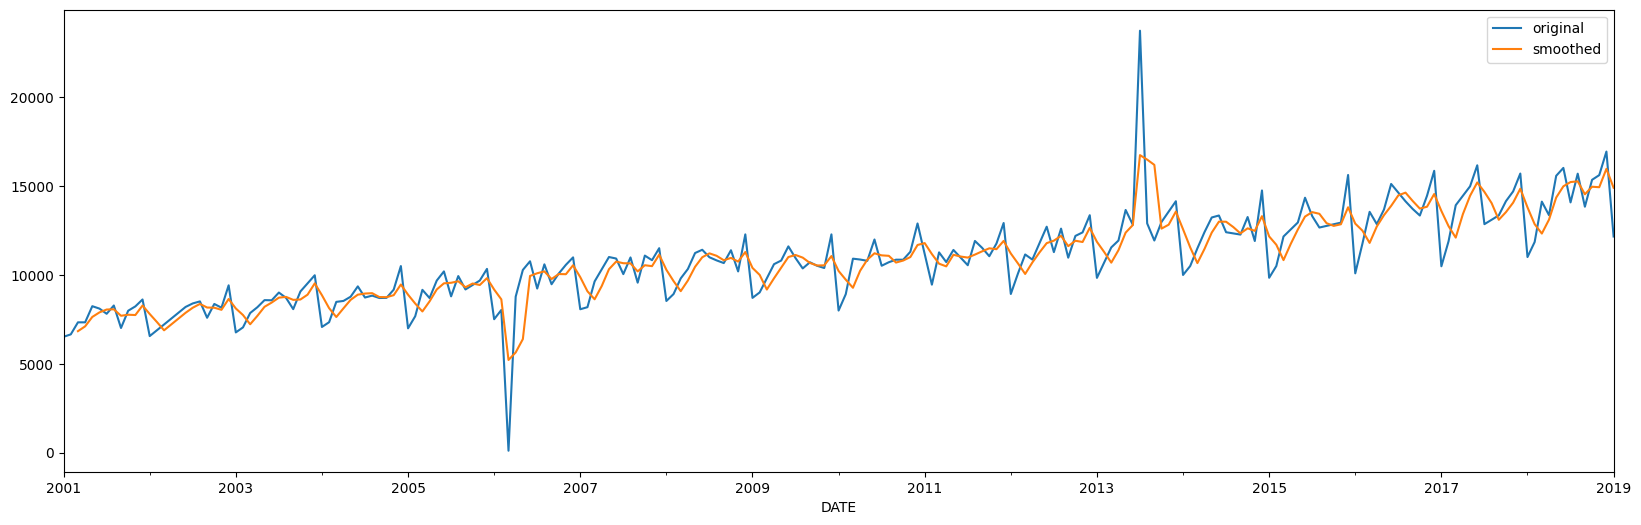

In [ ]:
mobile_sales['Sales'].plot(label = 'original')

mobile_sales['Sales'].rolling(3, center = False).mean().plot(label = 'smoothed')

plt.legend()

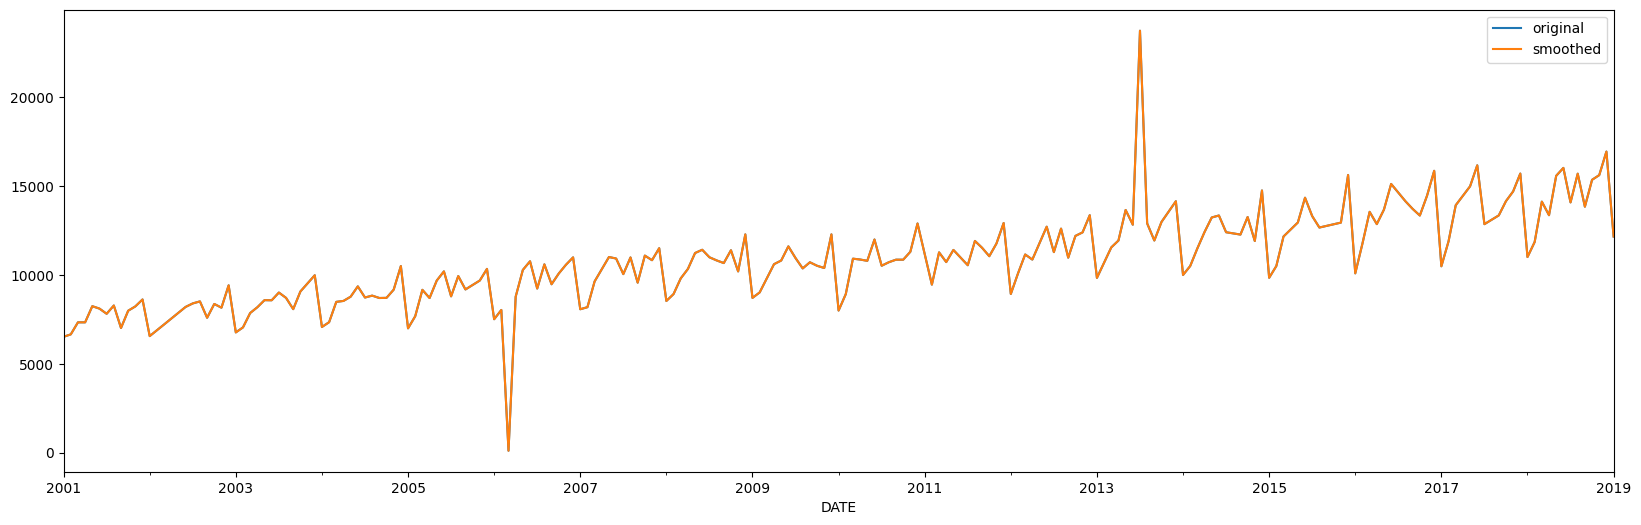

In [ ]:
mobile_sales['Sales'].plot(label = 'original')

mobile_sales['Sales'].rolling(1, center = False).mean().plot(label = 'smoothed')

plt.legend()

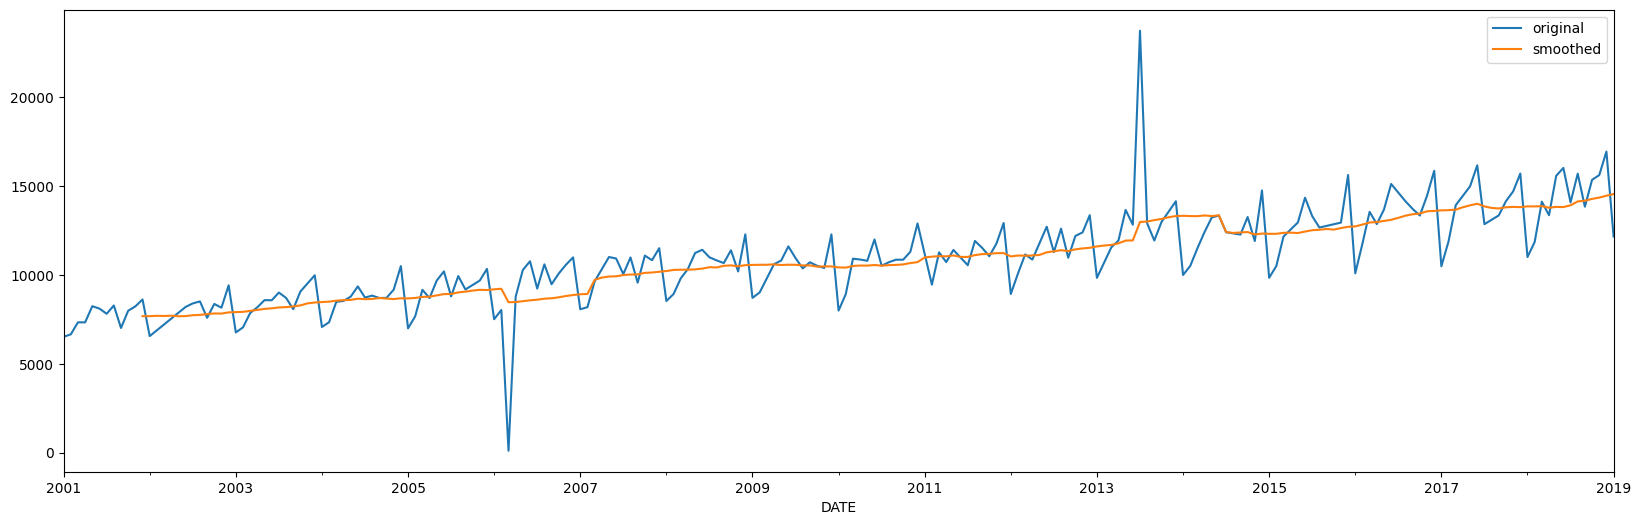

In [ ]:
mobile_sales['Sales'].plot(label = 'original')

mobile_sales['Sales'].rolling(12, center = False).mean().plot(label = 'smoothed')

plt.legend()

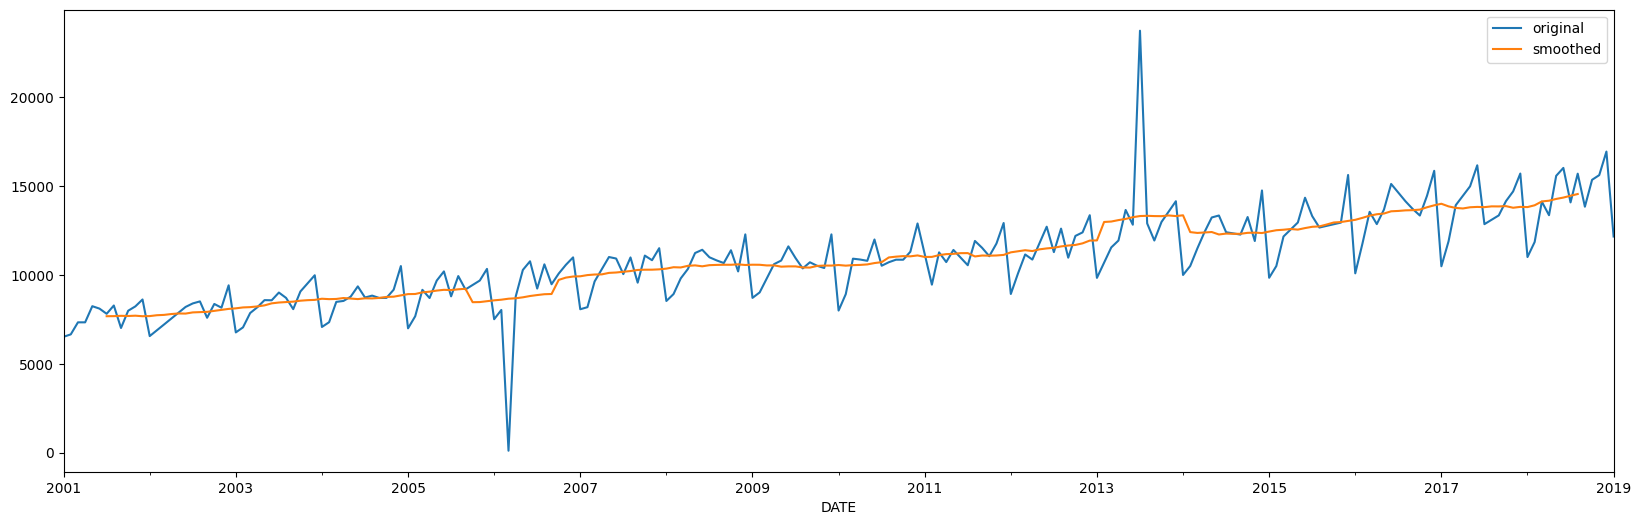

In [ ]:
mobile_sales['Sales'].plot(label = 'original')

mobile_sales['Sales'].rolling(12, center = True).mean().plot(label = 'smoothed')

plt.legend()

# Implementation of Additive Seasonality

In [ ]:
import statsmodels.api as sm

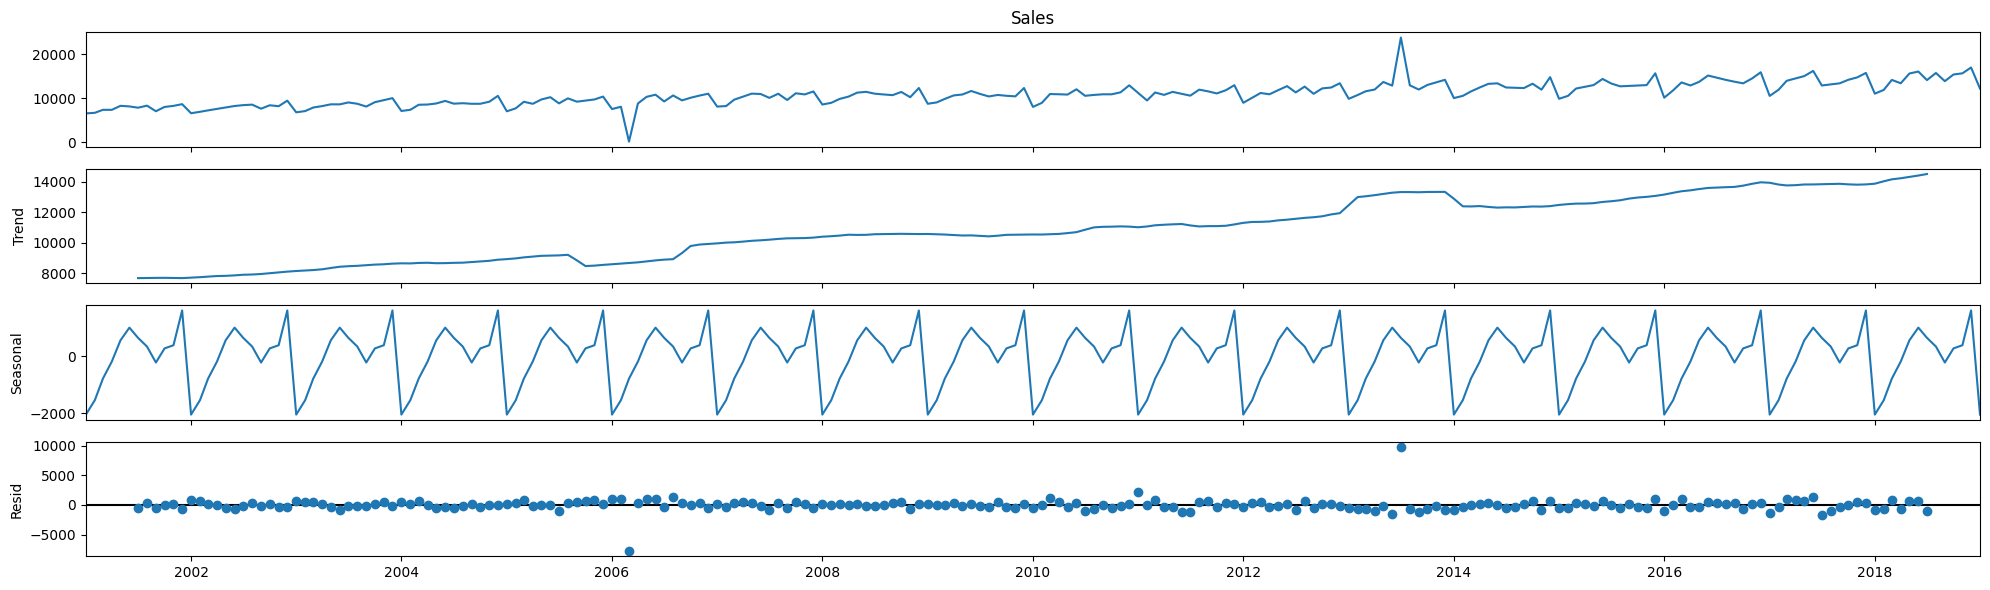

In [ ]:
sm_model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'additive')
sm_model.plot();

# Train-Test Split

In [ ]:
# Make a train_x which has starting 17 years of data
# Make a test_x which has last 12 months of data

train_max_date = mobile_sales.index[-12]
train_max_date

train_x = mobile_sales.loc[mobile_sales.index < train_max_date]
test_x = mobile_sales.loc[mobile_sales.index >= train_max_date]

print(train_x.shape)
print(test_x.shape)

(205, 1)
(12, 1)


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
# Where are train_y and test_y ?

# Forecasting Methods

# 1. Simple Mean Forecasting

In [ ]:
# F0recast the mean of the entire time series

train_x['Sales'].mean()

np.float64(10657.741463414633)

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

performance(test_x['Sales'], test_x['pred'])

MAE : 3893.425
RMSE : 4175.798
MAPE: 0.259


/tmp/ipython-input-1440382936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x['Sales'].mean()


<Axes: xlabel='DATE'>

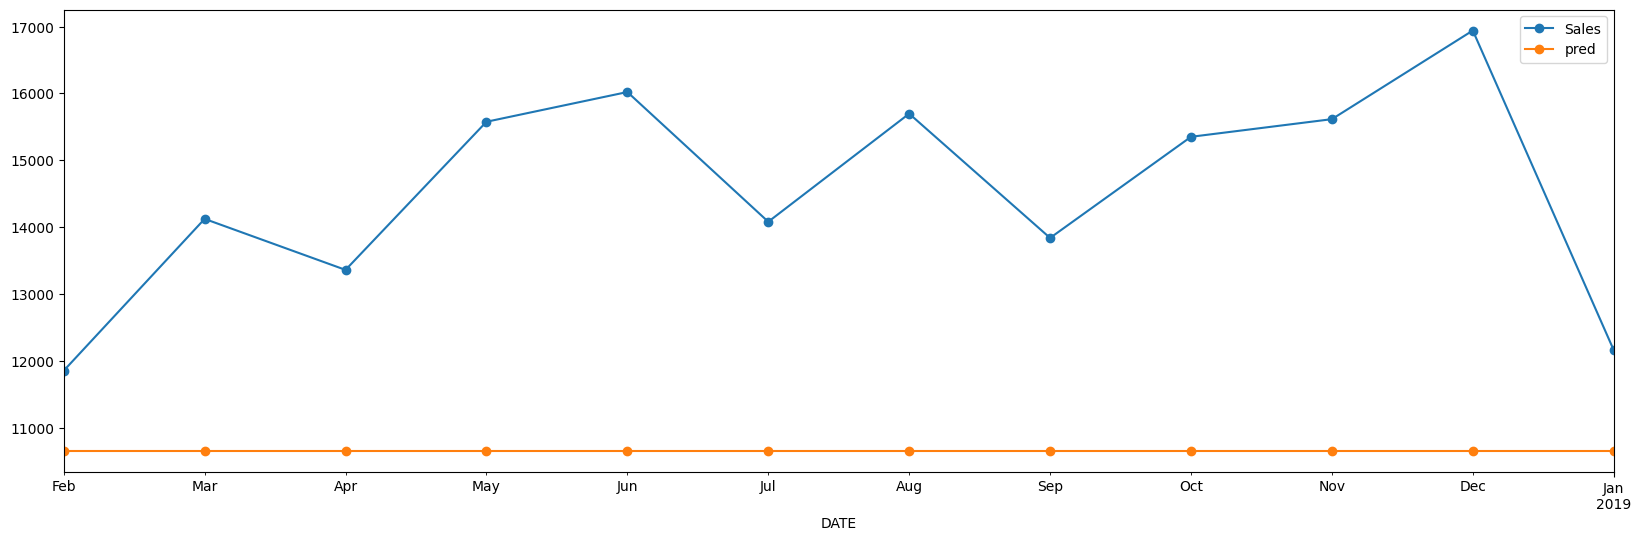

In [ ]:
test_x.plot(style = '-o')

MAE : 3884.167
RMSE : 4167.167
MAPE: 0.259


/tmp/ipython-input-4117413226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x['Sales'].median()


<Axes: xlabel='DATE'>

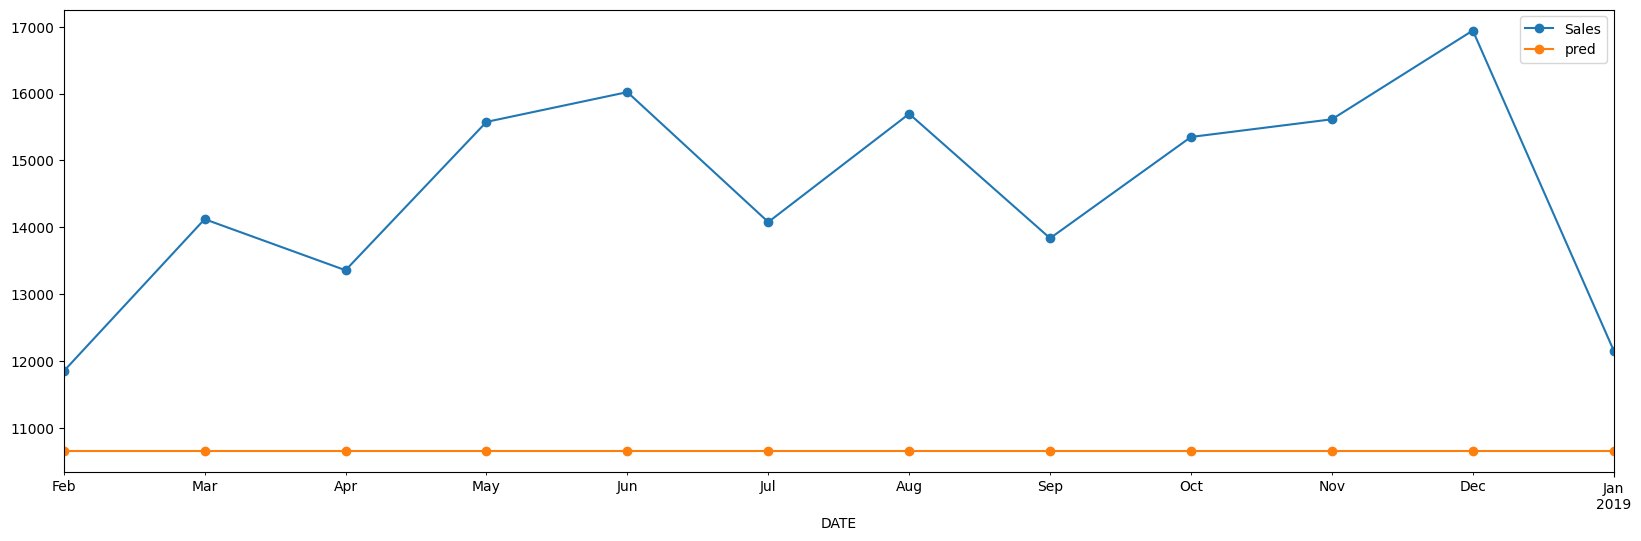

In [ ]:
# Simple Median Forecasting
test_x['pred'] = train_x['Sales'].median()

performance(test_x['Sales'], test_x['pred'])

test_x.plot(style = '-o')

# 2. Naive Approach

MAE : 3546.167
RMSE : 3854.067
MAPE: 0.235


/tmp/ipython-input-721531996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]
/tmp/ipython-input-721531996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x['Sales'][-1]


<Axes: xlabel='DATE'>

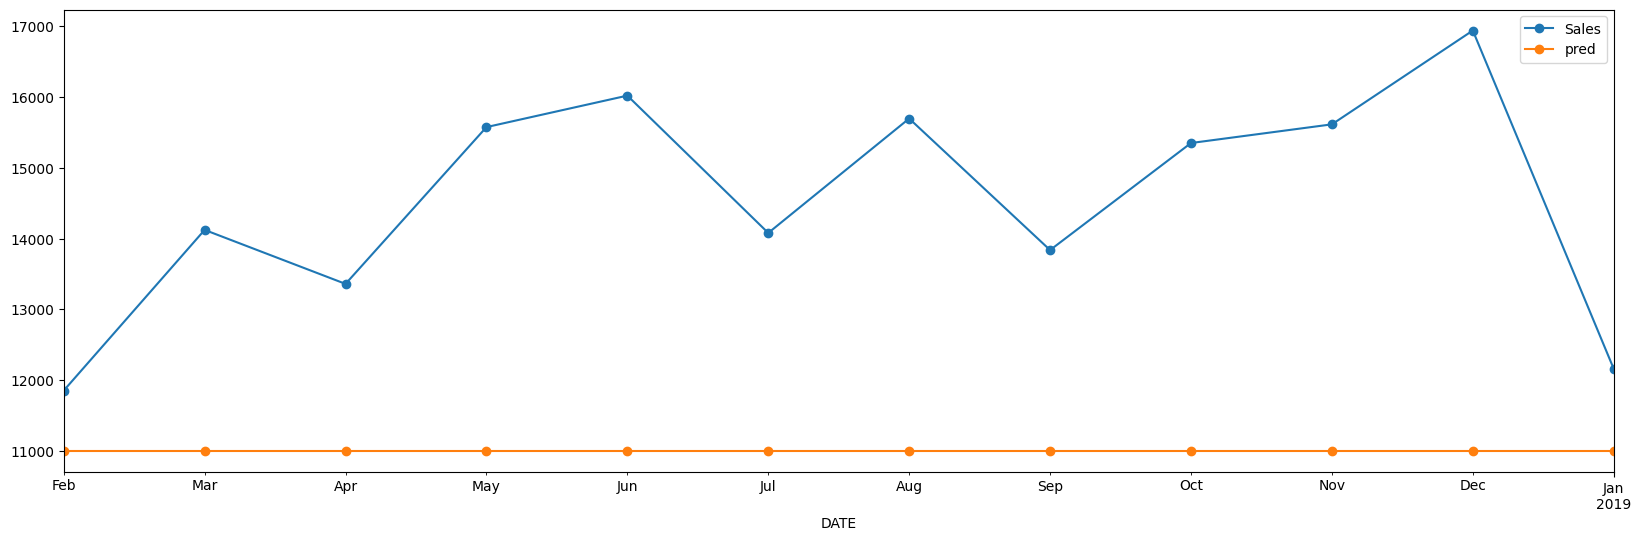

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

performance(test_x['Sales'], test_x['pred'])

test_x.plot(style = '-o')

# 3. Seasonal Naive Forecast

In [ ]:
# We can perhaps take a smarter approach to optimise the Naive method.

# We can set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year).

# This way, we're essentially forecasting the future values to be exactly same as last season.

# This is called Seasonal Naive Forecast.

MAE : 907.417
RMSE : 1126.351
MAPE: 0.062


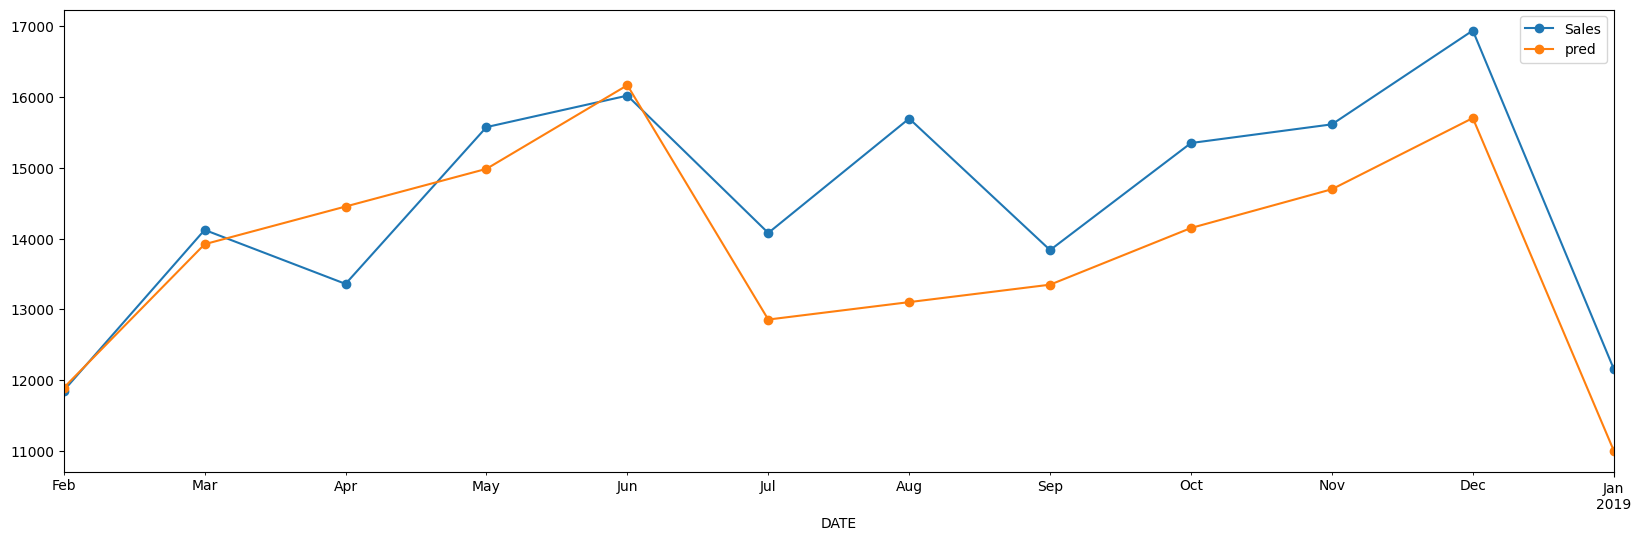

In [ ]:
for i in test_x.index:
  test_x.loc[i, 'pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

# 4. Drift Method

/tmp/ipython-input-13884936.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-1]
/tmp/ipython-input-13884936.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)
/tmp/ipython-input-13884936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = y_t + m * h


MAE : 3425.811
RMSE : 3735.003
MAPE: 0.227


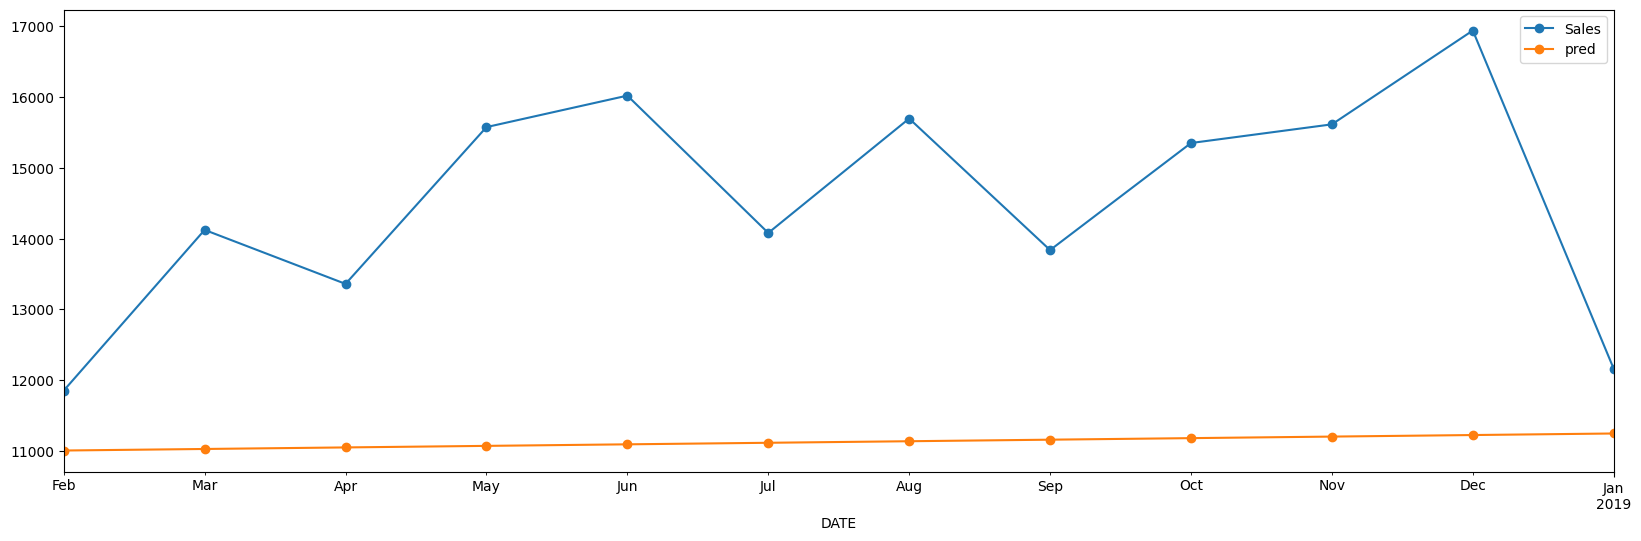

In [ ]:
# Get the slope
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])


/tmp/ipython-input-2392884454.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-2]
/tmp/ipython-input-2392884454.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)
/tmp/ipython-input-2392884454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = y_t + m * h


MAE : 1553.715
RMSE : 2028.97
MAPE: 0.118


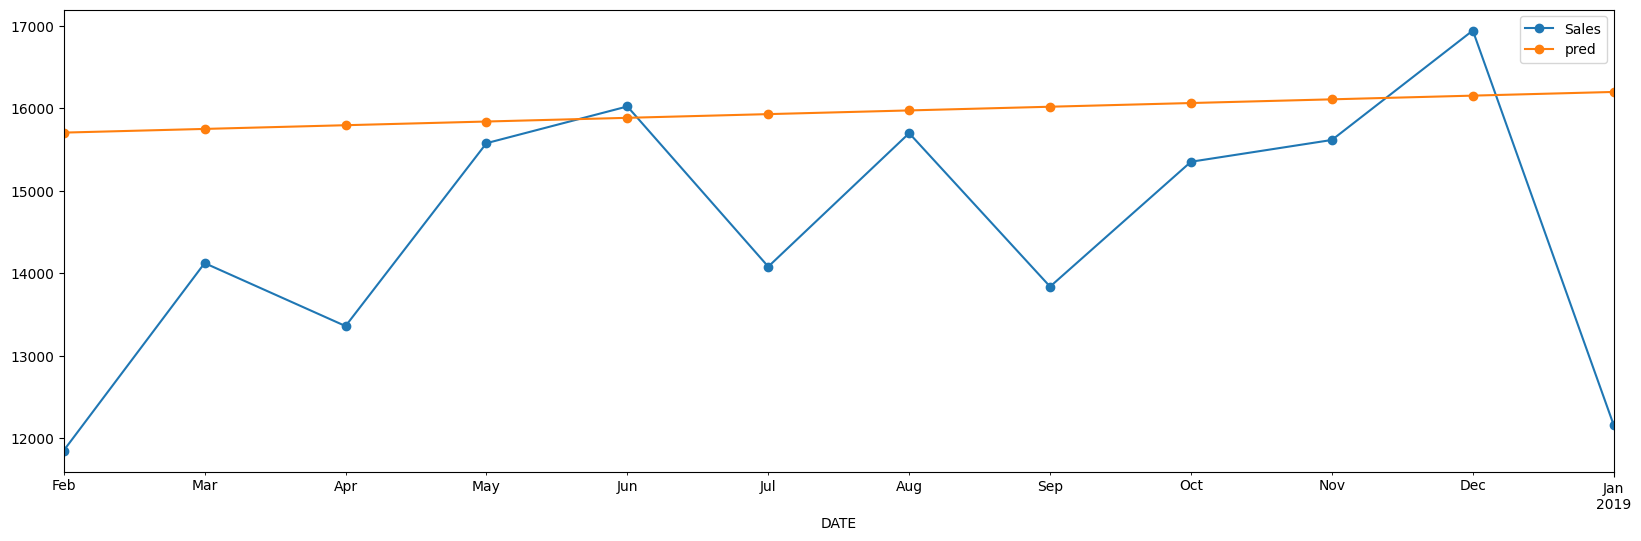

In [ ]:
# Get the slope
y_t = train_x['Sales'][-2]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])


# Smoothing Methods

# 1. Moving Average

In [ ]:
mobile_sales.tail()

,Sales
DATE,
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,16941.0
2019-01-01,12160.0


In [ ]:
df = mobile_sales.copy()

In [ ]:
temp_df = pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:])

In [ ]:
temp_df

""
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01


In [ ]:
df = pd.concat([df , temp_df])
df.tail(20)

,Sales
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,16941.0
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [ ]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([16021.        , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 16941.        , 12160.        ,
       14905.33333333, 14668.77777778, 13911.37037037, 14495.16049383,
       14358.43621399, 14254.98902606, 14369.52857796, 14327.65127267,
       14317.38962557, 14338.1898254 , 14327.74357455, 14327.77434184])

In [ ]:
pred = pred.round(1)
pred[-20:]

array([16021. , 14080. , 15697. , 13838. , 15351. , 15615. , 16941. ,
       12160. , 14905.3, 14668.8, 13911.4, 14495.2, 14358.4, 14255. ,
       14369.5, 14327.7, 14317.4, 14338.2, 14327.7, 14327.8])

<Axes: >

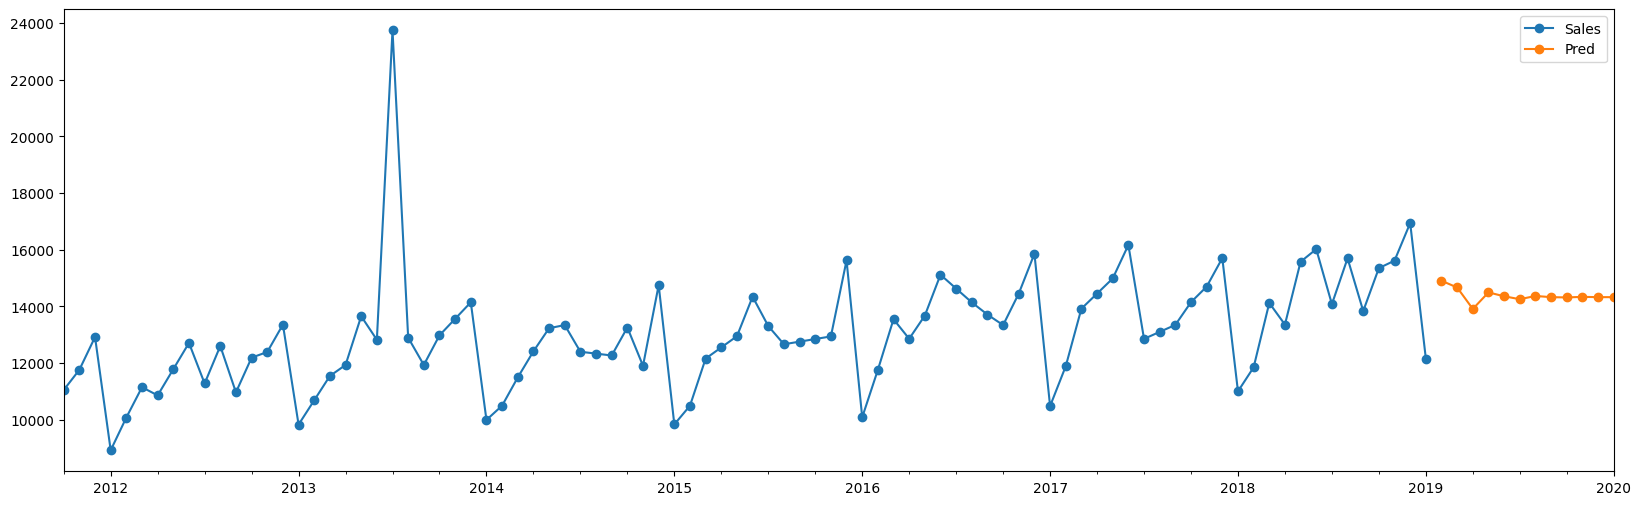

In [ ]:
df['Pred'] = pred

df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.tail(100).plot(style='-o')

In [ ]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

print(pred)

[ 6519.          6654.          7332.          7332.
  8240.          8104.          7813.          8279.
  7014.          7985.          8229.          8618.
  6558.          6882.          7211.          7540.
  7869.          8198.          8396.          8510.
  7589.          8366.          8156.          9415.
  6765.          7048.          7856.          8181.
  8581.          8573.          9008.          8708.
  8074.          9068.          9524.5         9981.
  7071.          7339.          8483.          8536.
  8774.          9355.          8728.          8835.
  8701.          8709.          9170.         10499.
  6994.          7675.          9161.          8699.
  9682.         10198.          8794.          9935.
  9182.          9433.          9684.         10339.
  7507.          8028.           108.          8777.
 10281.         10767.          9233.         10595.
  9475.         10077.         10569.         10987.
  8068.          8185.          9634.         

In [ ]:
pred[-12:]

array([14905.33333333, 14668.77777778, 13911.37037037, 14495.16049383,
       14358.43621399, 14254.98902606, 14369.52857796, 14327.65127267,
       14317.38962557, 14338.1898254 , 14327.74357455, 14327.77434184])

In [ ]:
test_x['Sales']

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


MAE : 1331.454
RMSE : 1584.208
MAPE: 0.094


/tmp/ipython-input-170217830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = pred[-12:]


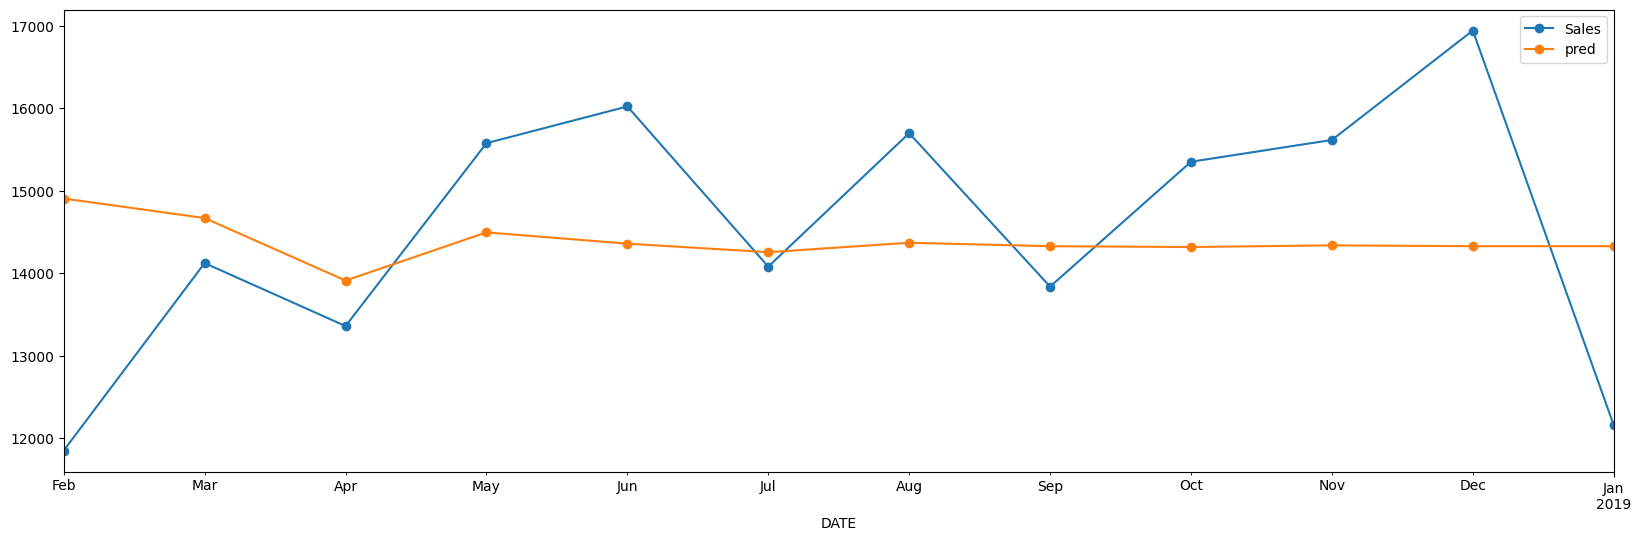

In [ ]:

test_x['pred'] = pred[-12:]
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

# 2. Simple exponential Smoothing

In [ ]:
import statsmodels.api as sm

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales['Sales']).fit(smoothing_level = 1 / (2*12)).fittedvalues)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


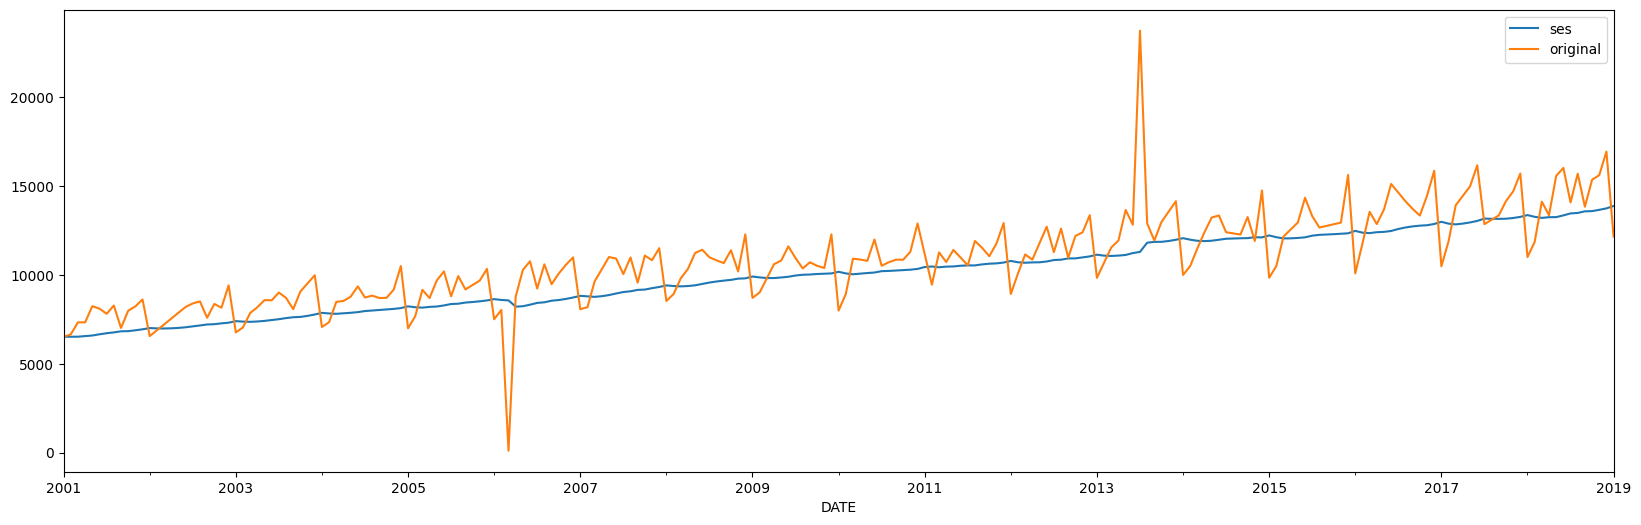

In [ ]:
model.plot(label='ses')
mobile_sales.Sales.plot(label='original')
plt.legend()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


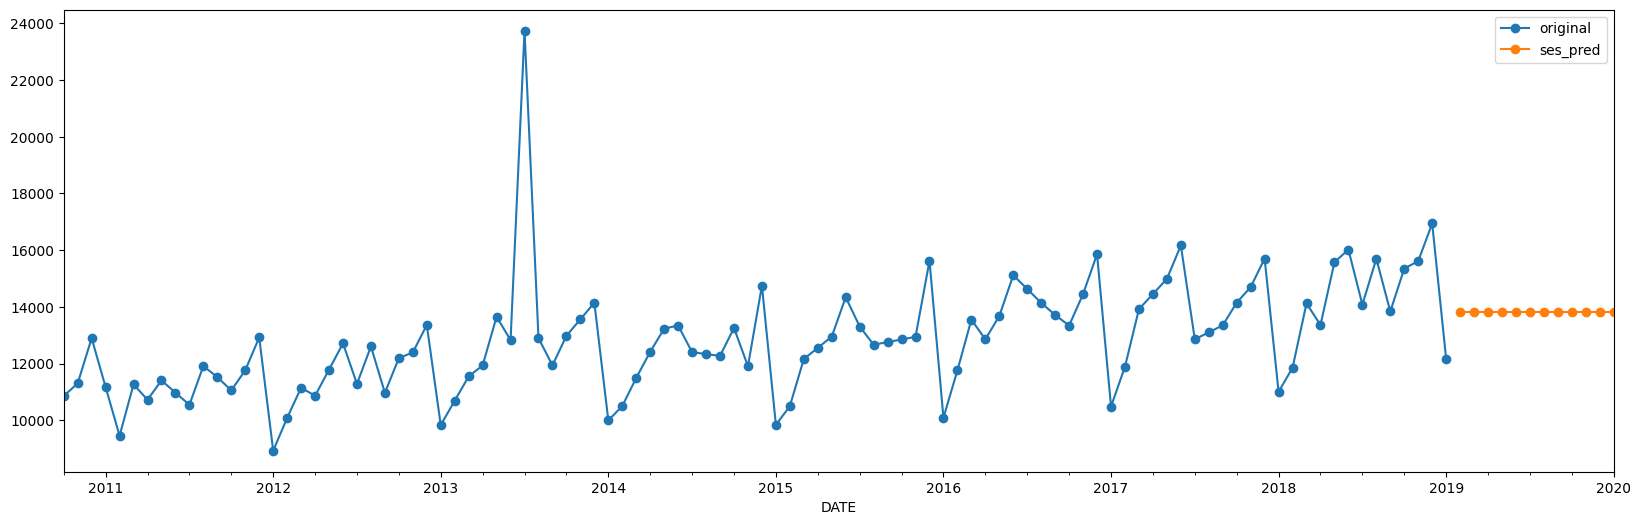

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=1/(2*12))
pred = model.forecast(steps = 12)

mobile_sales.Sales.tail(100).plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o')
plt.legend()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipython-input-60246727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps = 12)


MAE : 1703.587
RMSE : 1980.934
MAPE: 0.113


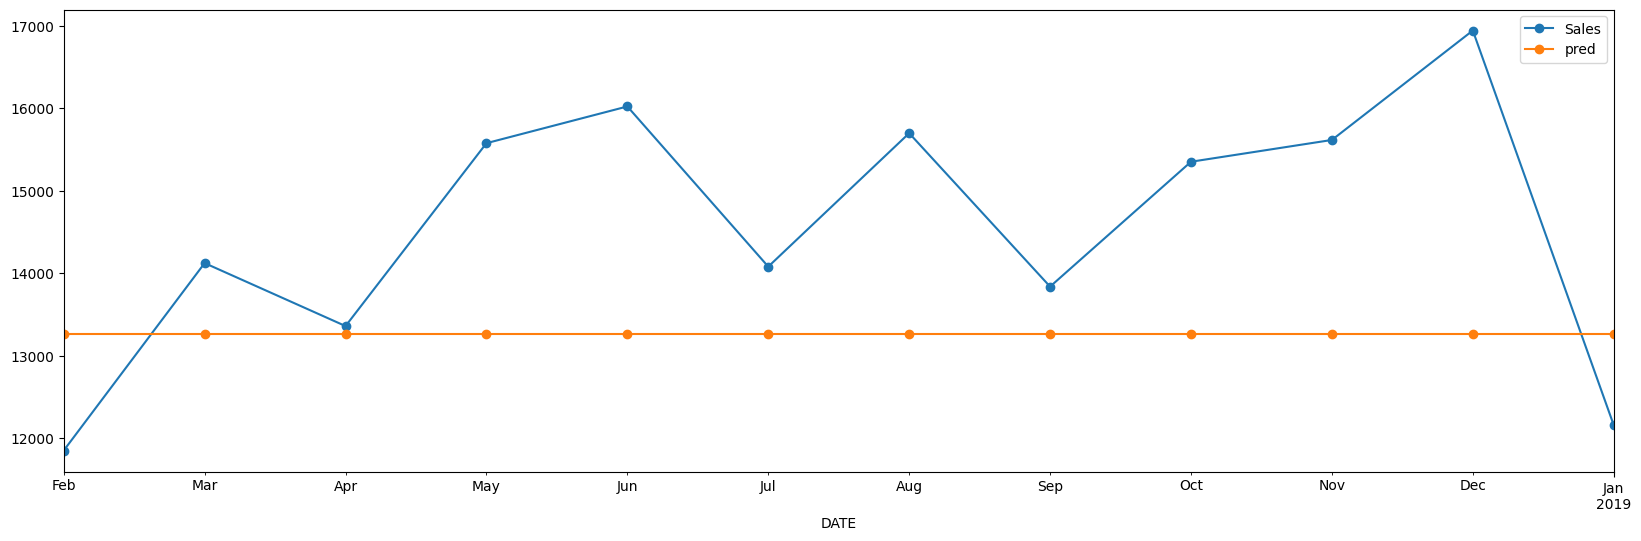

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


# 3. Double Exponential smoothing (Holt's method)

Within our ExponentialSmoothing() function of statsmodels, we can assign the parameter trend.

Based on whether we wish to use an Additive or a Multiplicative model, we can assign trend="add" or trend="mul" respectively

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


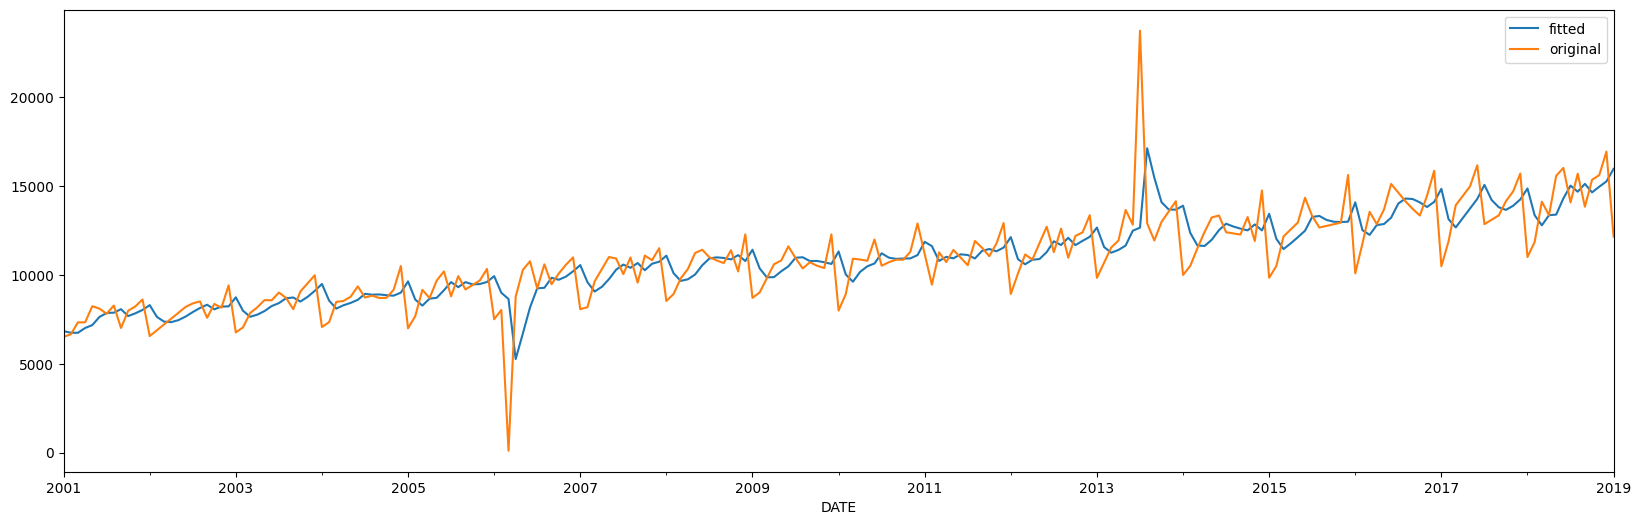

In [ ]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()


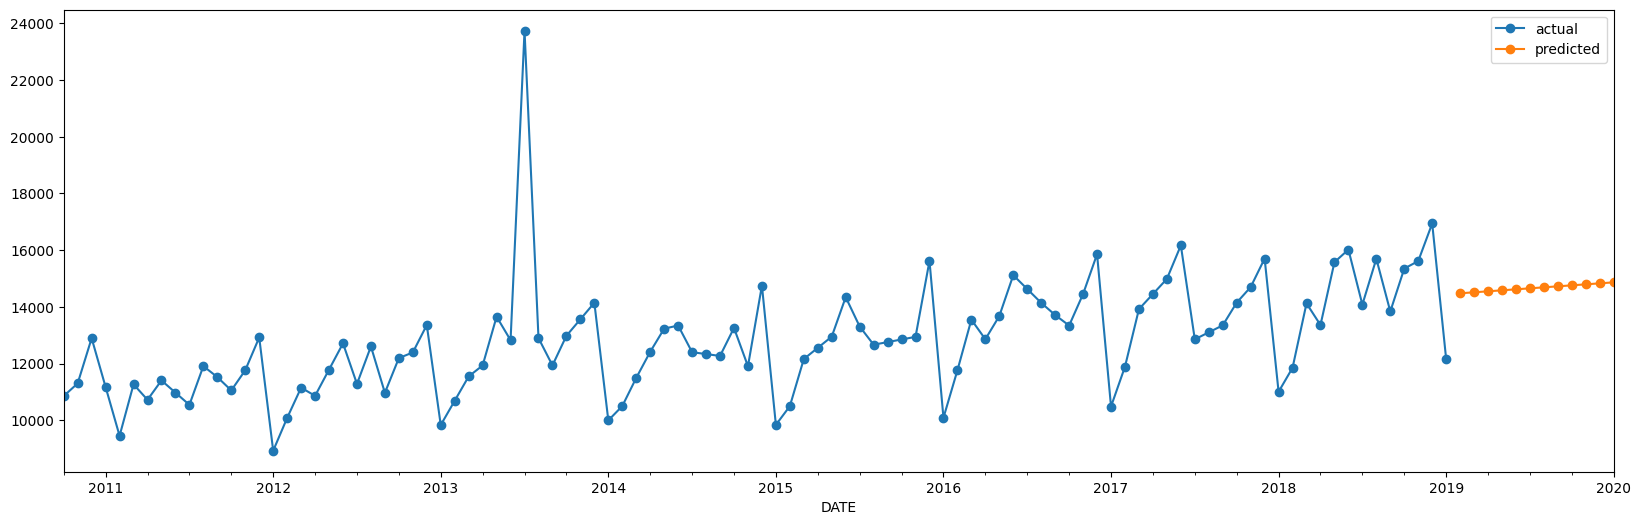

In [ ]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2153276219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps = 12)


MAE : 1282.955
RMSE : 1511.515
MAPE: 0.089


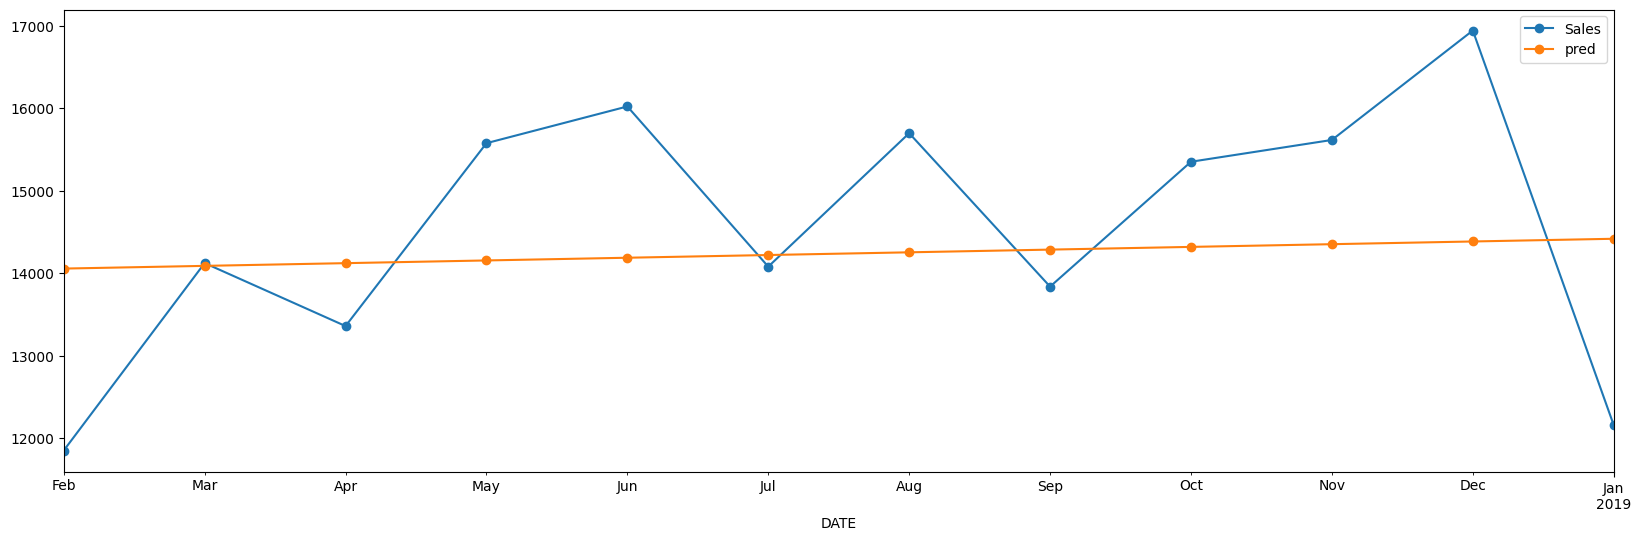

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


# 4. Triple Exponential smoothing (Holt Winter's method)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

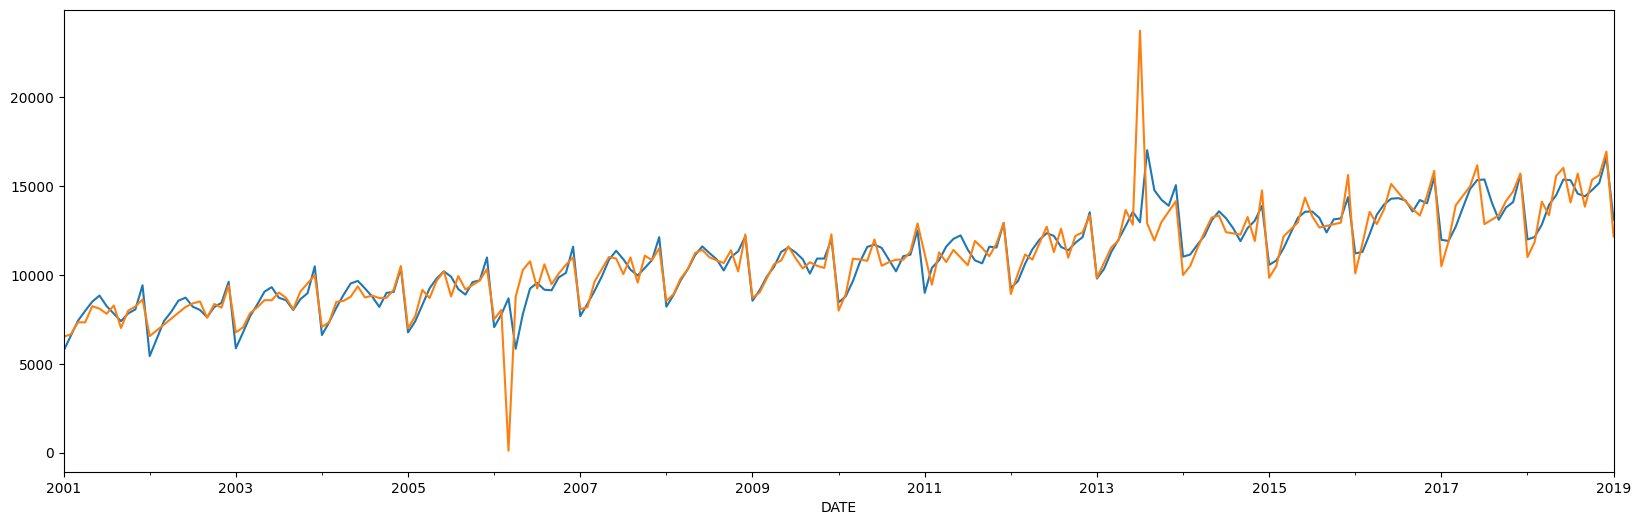

In [ ]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal='add').fit(smoothing_level=0.4)
model.fittedvalues.plot()
mobile_sales.Sales.plot()


<Axes: xlabel='DATE'>

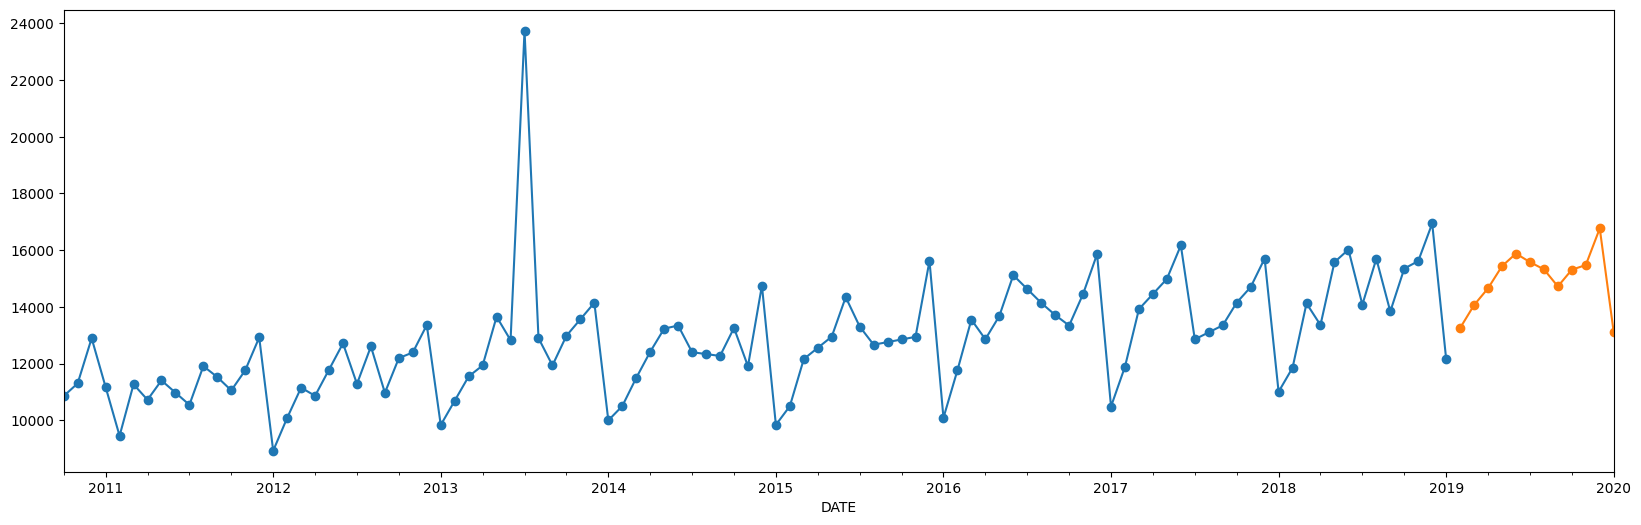

In [ ]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o')
pred.plot(style='-o')


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-63664934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps=12)


MAE : 761.941
RMSE : 816.622
MAPE: 0.051


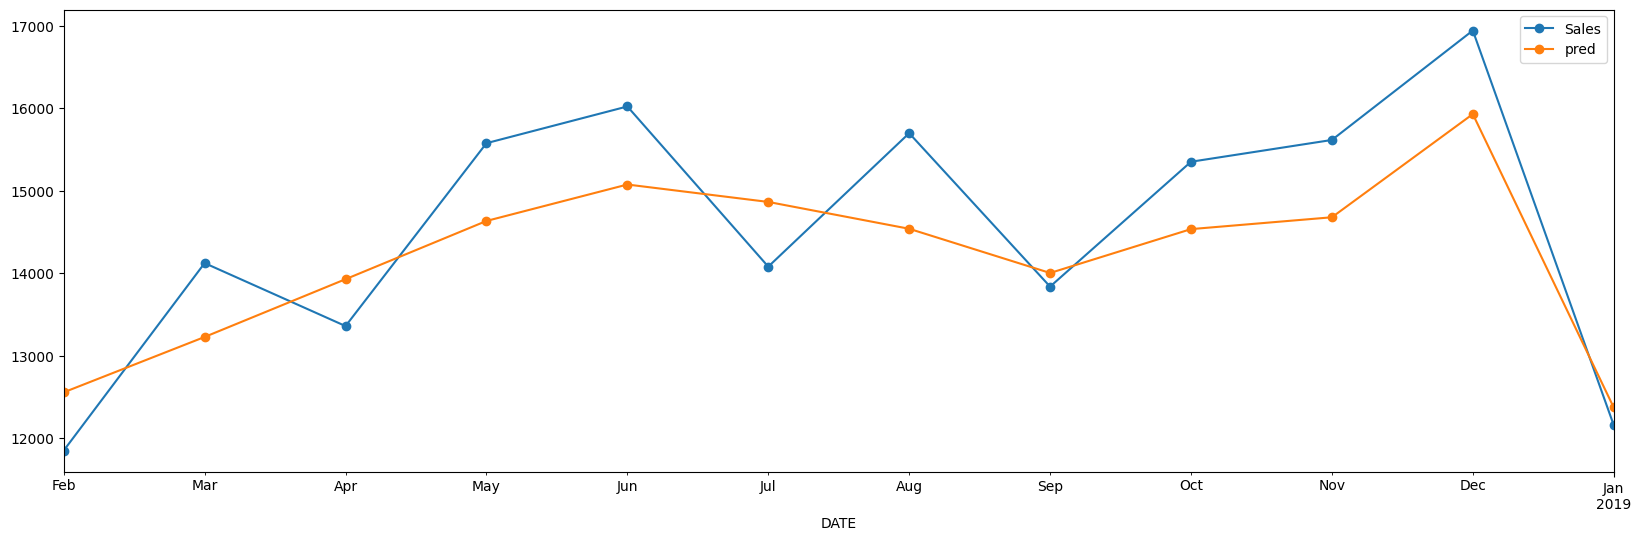

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1732316570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps=12)


MAE : 674.643
RMSE : 745.731
MAPE: 0.046


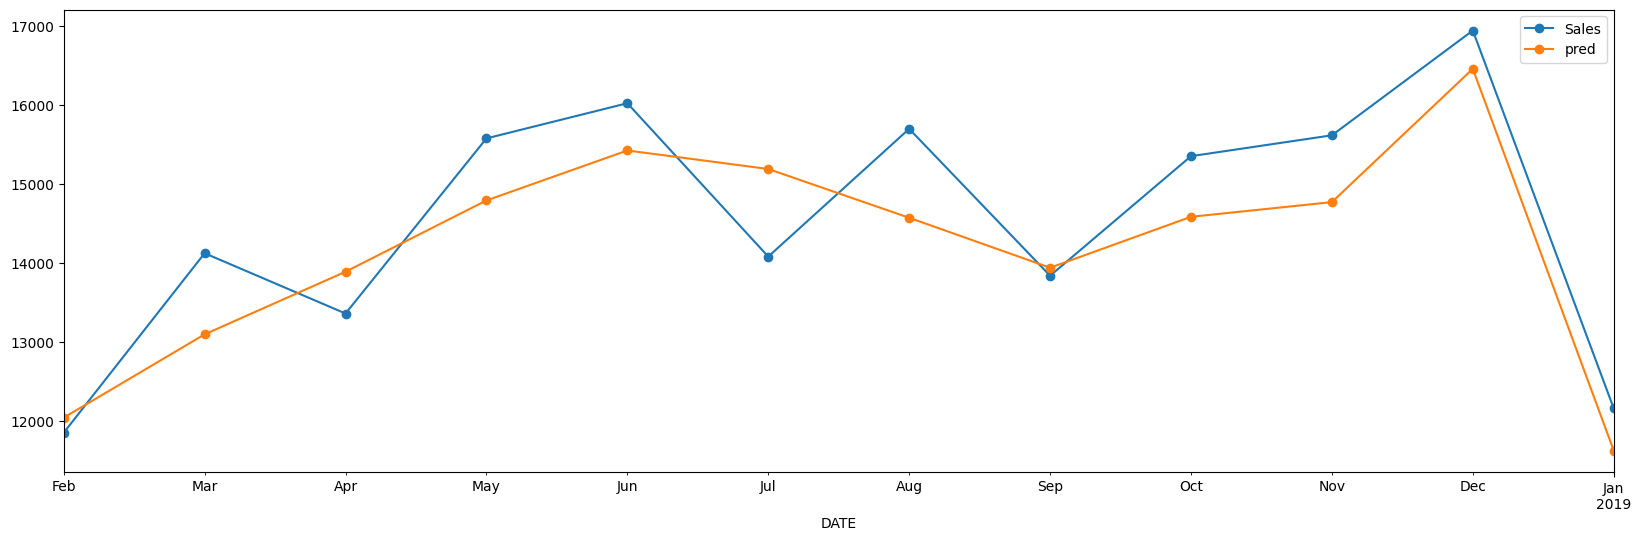

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal='mul').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


# Test for Stationarity - ADF

In [ ]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

np.float64(0.9451861677902991)

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
  #  print(pvalue)
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')


adf_test(mobile_sales.Sales)

Sequence is not stationary


# De-trending

<Axes: xlabel='DATE'>

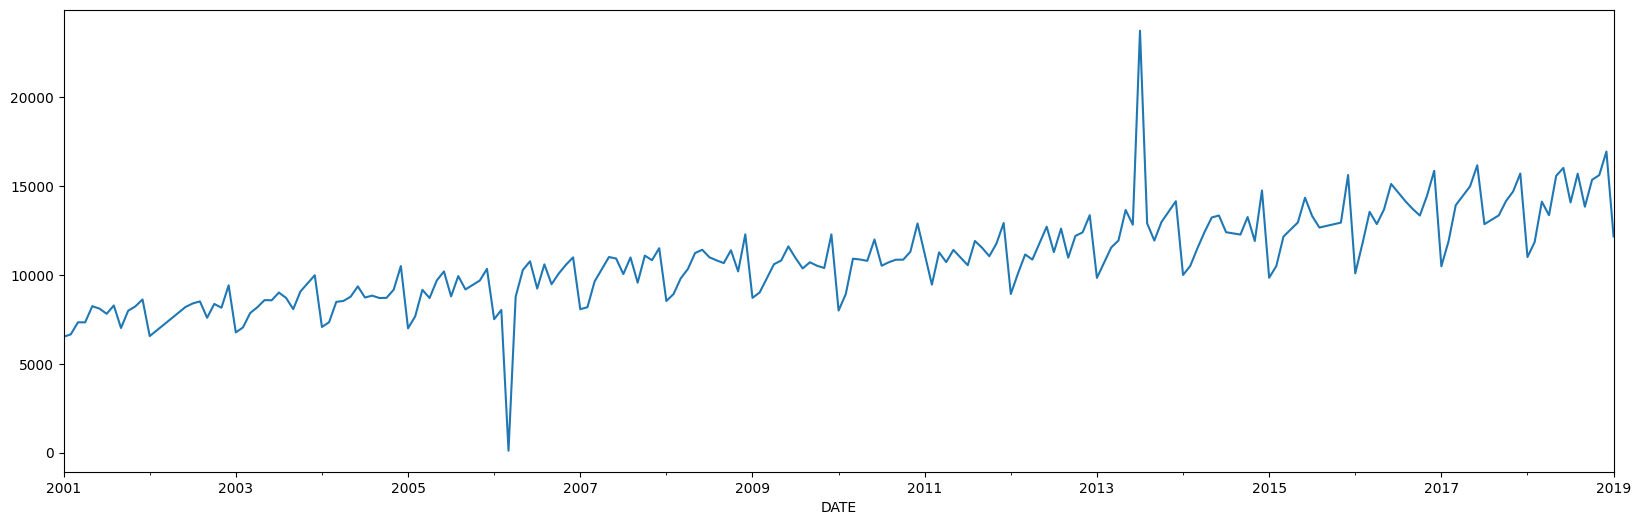

In [ ]:
mobile_sales.Sales.plot()


<Axes: xlabel='DATE'>

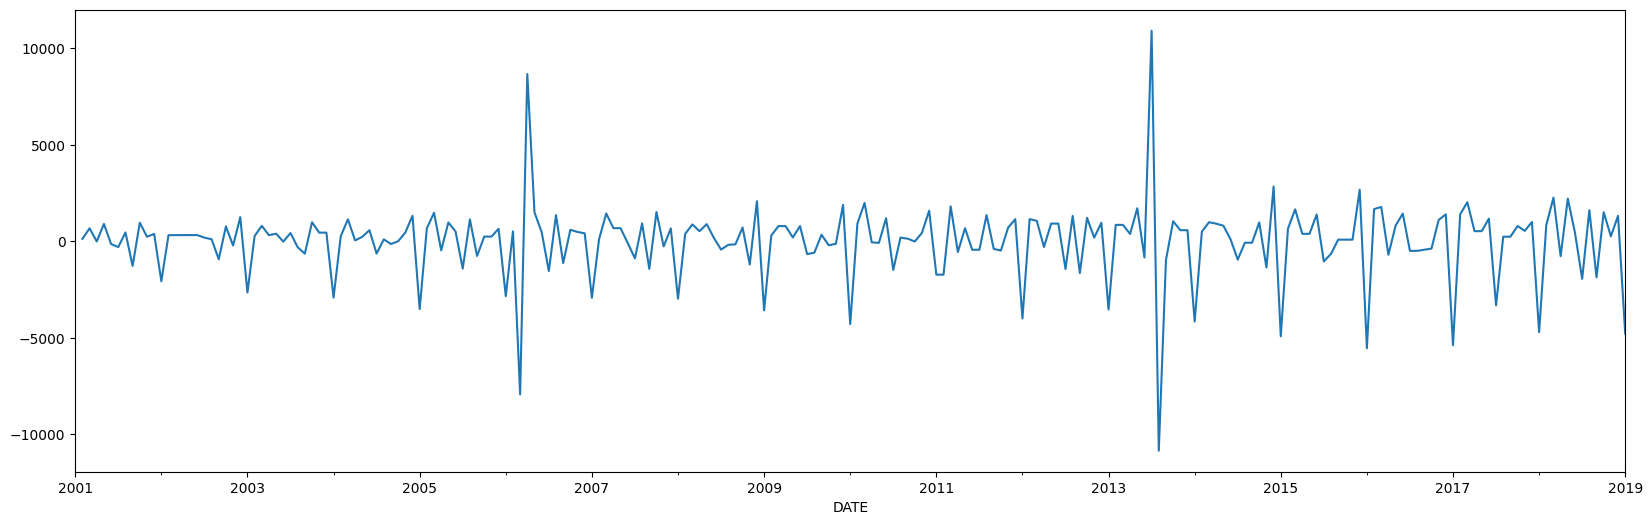

In [ ]:
detrend = mobile_sales.Sales.diff()
detrend.plot()


<Axes: xlabel='DATE'>

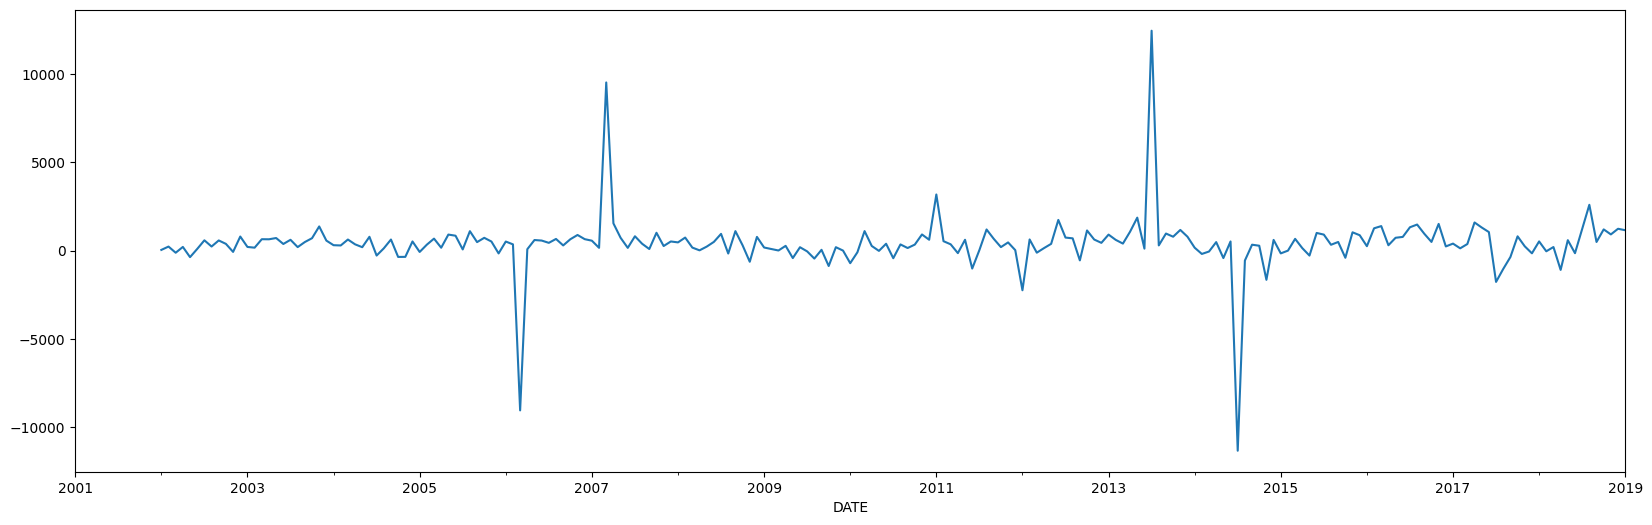

In [ ]:
deseasonal = mobile_sales.Sales.diff(12)
deseasonal.plot()


In [ ]:
adf_test(detrend.dropna())

Sequence is stationary


In [ ]:
adf_test(deseasonal.dropna())

Sequence is stationary


<Axes: xlabel='DATE'>

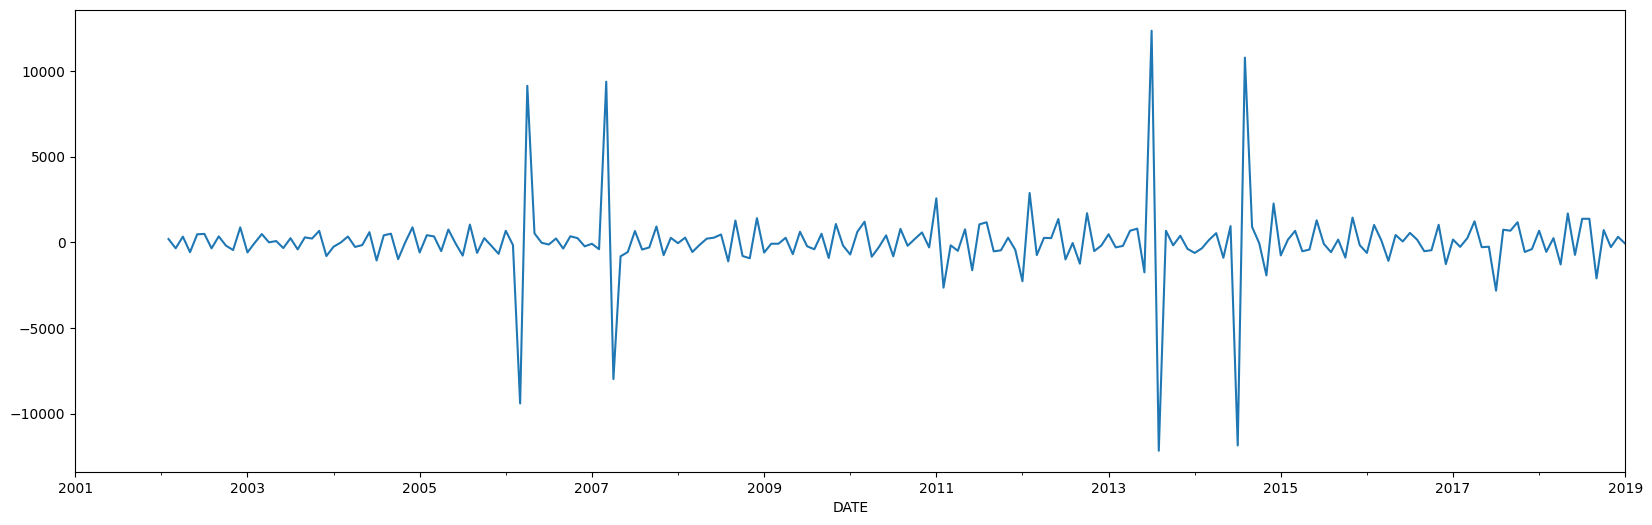

In [ ]:
stationary = mobile_sales.Sales.diff(1).diff(12)
stationary.plot()

# ACF

In [ ]:
mobile_sales.Sales.head()


,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [ ]:
mobile_sales.Sales.shift(1).head()

,Sales
DATE,
2001-01-01,NaN
2001-02-01,6519.0
2001-03-01,6654.0
2001-04-01,7332.0
2001-05-01,7332.0


In [ ]:
lag = 1
np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]


np.float64(0.7073562094395749)

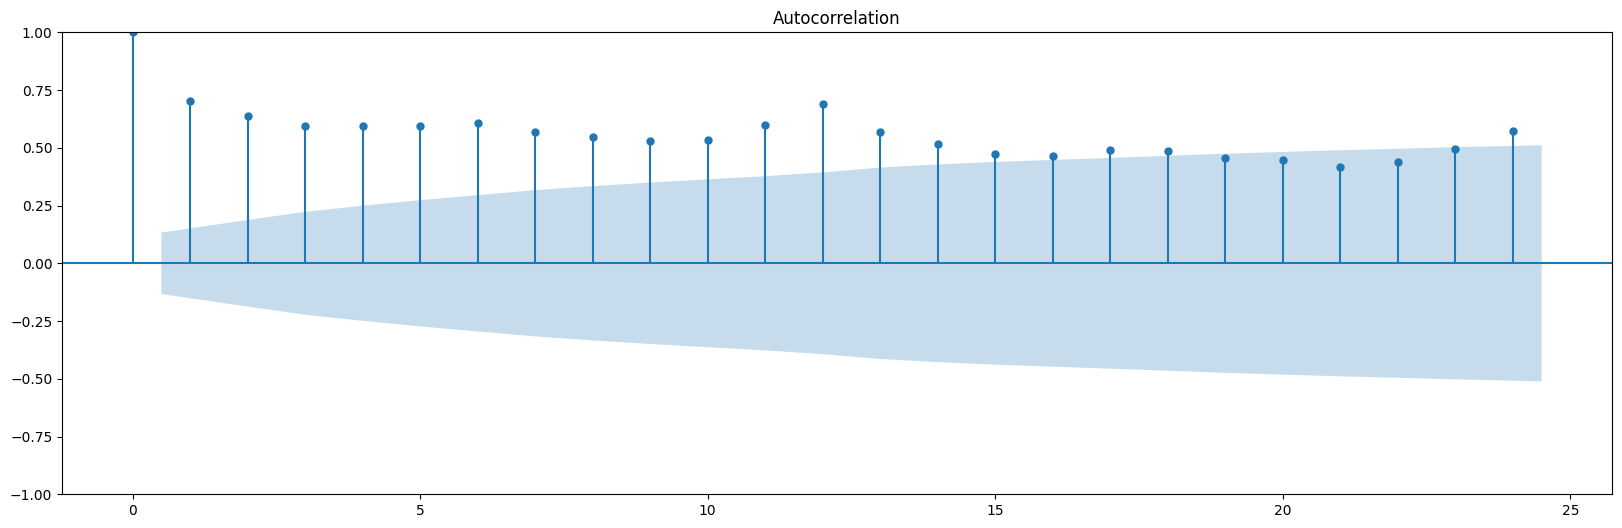

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mobile_sales.Sales);


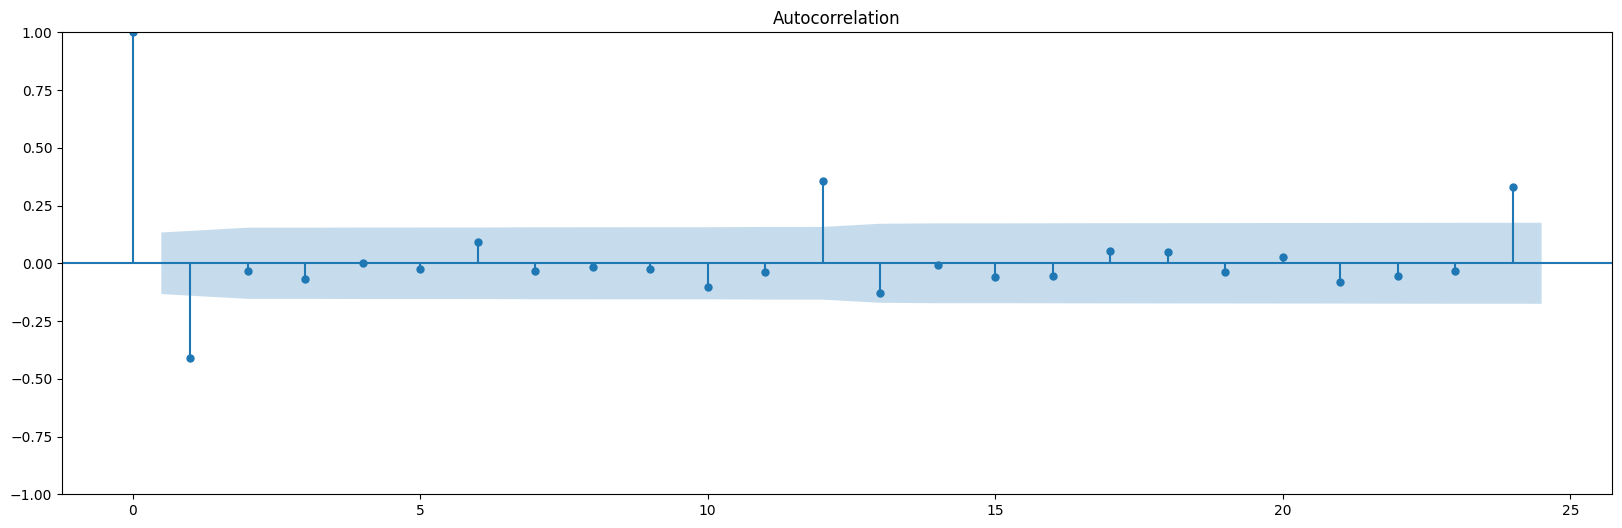

In [ ]:
plot_acf(mobile_sales.Sales.diff().dropna());


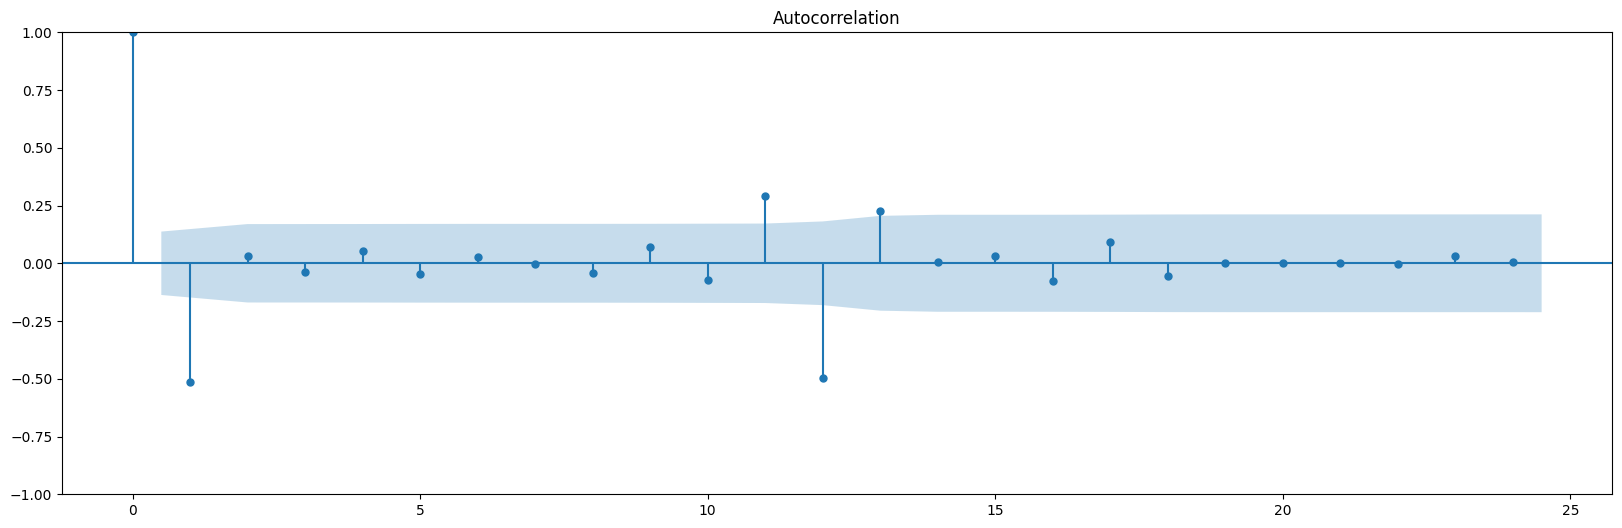

In [ ]:
plot_acf(mobile_sales.Sales.diff().diff(12).dropna());


# PACF

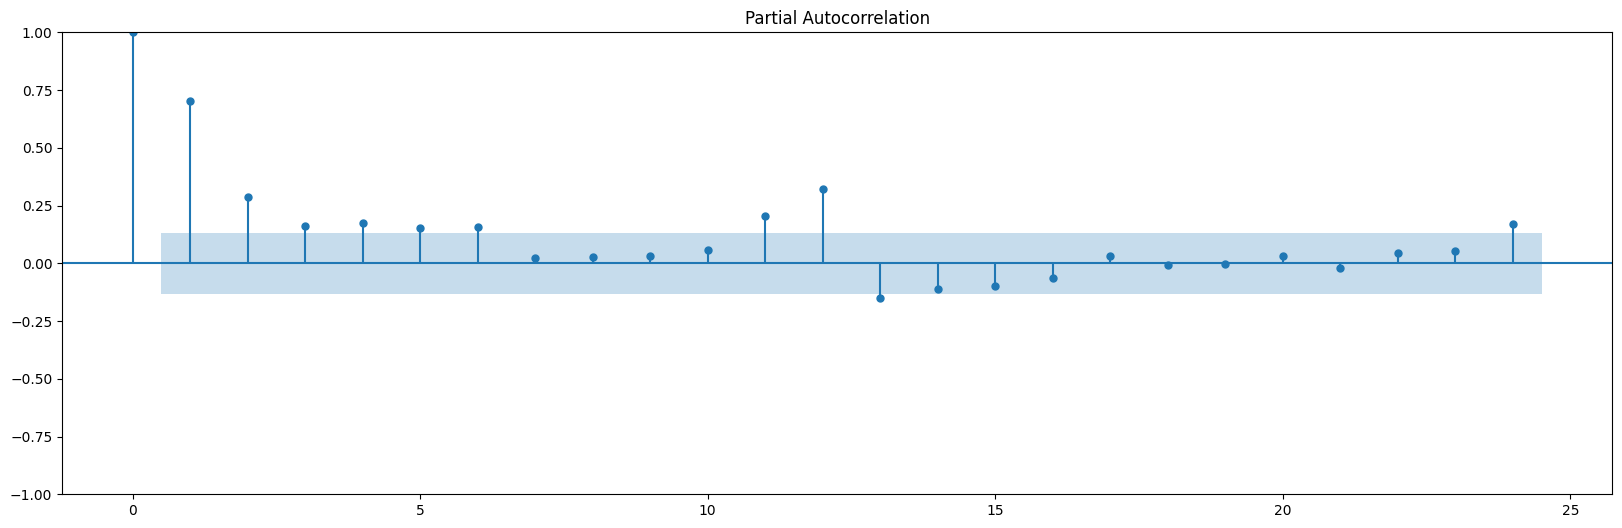

In [ ]:
plot_pacf(mobile_sales.Sales);


In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,12042.446390
2018-03-01,14123.0,13096.351417
2018-04-01,13360.0,13888.871601
2018-05-01,15576.0,14790.777122
2018-06-01,16021.0,15423.067168
2018-07-01,14080.0,15188.797392
2018-08-01,15697.0,14571.545582
2018-09-01,13838.0,13939.471318
2018-10-01,15351.0,14583.746941
